In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import plot_model

In [3]:
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

## Creating data to view and fit

In [4]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
# Create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

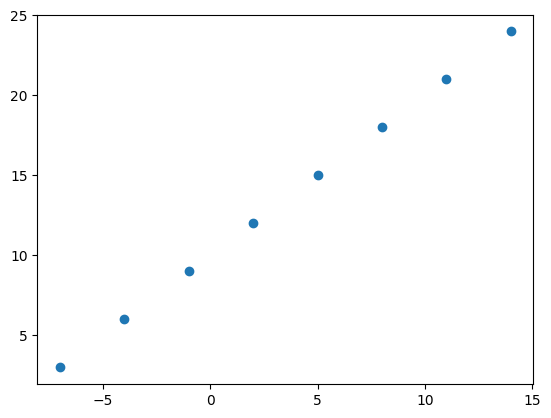

In [5]:
# Visualize
plt.scatter(X, Y)

In [6]:
input_shape = X.shape
output_shape = Y.shape
input_shape, output_shape

((8,), (8,))

In [7]:
# Turn numpy arrays into tensors
X = tf.constant(X)
Y = tf.constant(Y)
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in modeling with tensorflow

1. Creating a model: Define input and output laters as well as the hidden layers
2. Compiling a model: Define loss function,  optimizer (how to improve the learning) and evaluation metrics.
3. Fitting a model: Find the patterns.

In [8]:
# Set random seed
tf.random.set_seed(42)

In [9]:
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])
# Compile the model
model.compile(loss=tf.keras.losses.mae,      # MAE: Mean absolote error
             optimizer=tf.keras.optimizers.SGD(), # SGD: Stochastic gradient descent
             metrics=['mae'])  
# Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 9.1373 - mae: 9.1373
Epoch 2/5
1/1 [==============================] - 0s 16ms/step - loss: 9.0048 - mae: 9.0048
Epoch 3/5
1/1 [==============================] - 0s 16ms/step - loss: 8.8723 - mae: 8.8723
Epoch 4/5
1/1 [==============================] - 0s 16ms/step - loss: 8.7398 - mae: 8.7398
Epoch 5/5
1/1 [==============================] - 0s 16ms/step - loss: 8.6073 - mae: 8.6073


In [10]:
# Check prediction
model.predict([17.0])

1/1 [==============================] - 0s 359ms/step


array([[24.21549]], dtype=float32)

## Improve the model

1. Create a model: Add more layers, increase the number of hidden units (neurons) within layers, change activation function of each layer.
2. Compile the model: Change optimization, change the learning rate of optimization function.
3. Fit the model: Change epochs (look at the data more times). Feed more data to train.

In [11]:
# Rebuild the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])
# Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=['mae'])  
# Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 15.3404 - mae: 15.3404
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 15.0591 - mae: 15.0591
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 14.8444 - mae: 14.8444
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 14.7119 - mae: 14.7119
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 14.5794 - mae: 14.5794
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 14.4469 - mae: 14.4469
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 14.3144 - mae: 14.3144
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 14.1819 - mae: 14.1819
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 14.0494 - mae: 14.0494
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 13.9169 - mae: 13.9169
Epoch 11/100
1/1 [==============================] -

1/1 [==============================] - 0s 16ms/step - loss: 6.9056 - mae: 6.9056
Epoch 88/100
1/1 [==============================] - 0s 16ms/step - loss: 6.9000 - mae: 6.9000
Epoch 89/100
1/1 [==============================] - 0s 16ms/step - loss: 6.8944 - mae: 6.8944
Epoch 90/100
1/1 [==============================] - 0s 16ms/step - loss: 6.8888 - mae: 6.8888
Epoch 91/100
1/1 [==============================] - 0s 16ms/step - loss: 6.8831 - mae: 6.8831
Epoch 92/100
1/1 [==============================] - 0s 31ms/step - loss: 6.8775 - mae: 6.8775
Epoch 93/100
1/1 [==============================] - 0s 16ms/step - loss: 6.8719 - mae: 6.8719
Epoch 94/100
1/1 [==============================] - 0s 16ms/step - loss: 6.8663 - mae: 6.8663
Epoch 95/100
1/1 [==============================] - 0s 16ms/step - loss: 6.8606 - mae: 6.8606
Epoch 96/100
1/1 [==============================] - 0s 16ms/step - loss: 6.8550 - mae: 6.8550
Epoch 97/100
1/1 [==============================] - 0s 16ms/step - loss: 

In [12]:
model.predict([17.0])

1/1 [==============================] - 0s 297ms/step


array([[29.399609]], dtype=float32)

In [13]:
# Trying another change: Extra layer with 100 hidden units
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])
# Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics=['mae'])  
# Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.7663 - mae: 13.7663
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 13.1298 - mae: 13.1298
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 12.4983 - mae: 12.4983
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 11.8684 - mae: 11.8684
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 11.2363 - mae: 11.2363
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 10.5980 - mae: 10.5980
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 9.9498 - mae: 9.9498
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 9.2881 - mae: 9.2881
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 8.6095 - mae: 8.6095
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 7.9111 - mae: 7.9111
Epoch 11/100
1/1 [==============================] - 0s 16ms

1/1 [==============================] - 0s 16ms/step - loss: 0.2526 - mae: 0.2526
Epoch 89/100
1/1 [==============================] - 0s 16ms/step - loss: 0.3614 - mae: 0.3614
Epoch 90/100
1/1 [==============================] - 0s 16ms/step - loss: 0.2535 - mae: 0.2535
Epoch 91/100
1/1 [==============================] - 0s 16ms/step - loss: 0.3389 - mae: 0.3389
Epoch 92/100
1/1 [==============================] - 0s 16ms/step - loss: 0.2577 - mae: 0.2577
Epoch 93/100
1/1 [==============================] - 0s 16ms/step - loss: 0.2324 - mae: 0.2324
Epoch 94/100
1/1 [==============================] - 0s 16ms/step - loss: 0.1297 - mae: 0.1297
Epoch 95/100
1/1 [==============================] - 0s 16ms/step - loss: 0.2402 - mae: 0.2402
Epoch 96/100
1/1 [==============================] - 0s 16ms/step - loss: 0.2572 - mae: 0.2572
Epoch 97/100
1/1 [==============================] - 0s 16ms/step - loss: 0.2176 - mae: 0.2176
Epoch 98/100
1/1 [==============================] - 0s 16ms/step - loss: 

In [14]:
# Might be overfitting, since the metrics is better, but the predicion deviates more than the previous test 
model.predict([17.0])

1/1 [==============================] - 0s 297ms/step


array([[27.843687]], dtype=float32)

## Evaluating a model

"Visualize, visualize, visualize"

In [15]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [16]:
# Make labels
Y = X + 10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

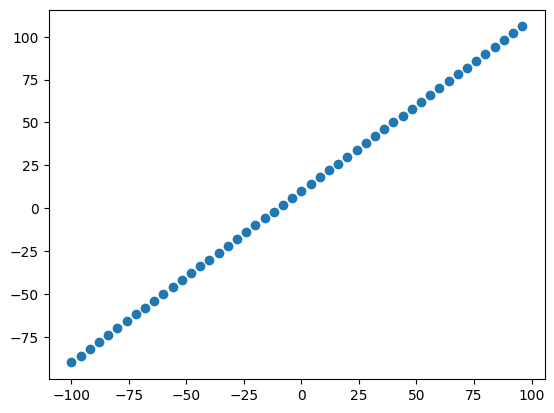

In [17]:
# Visualize the data
plt.scatter(X, Y)

In [18]:
# Split the data in train/test
X_train = X[:40]
Y_train = Y[:40]
X_test = X[40:]
Y_test = Y[40:]

len(X_train), len(X_test), len(Y_train), len(Y_test)

(40, 10, 40, 10)

## Visualizing the data

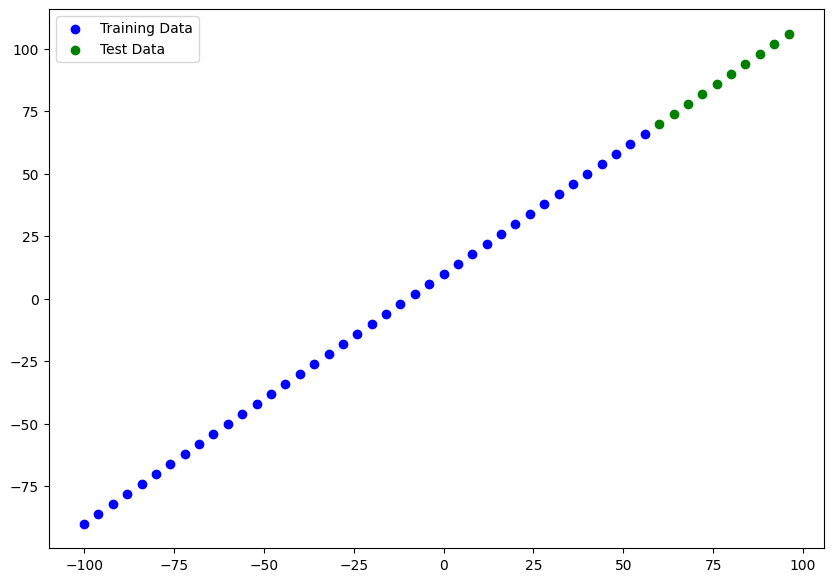

In [19]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, Y_train, c='b', label='Training Data')
plt.scatter(X_test, Y_test, c='g', label='Test Data')
plt.legend()
plt.show()

In [41]:
# Neural network for our data
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='Input_Layer'),
    tf.keras.layers.Dense(1, name='Output_Layer'),
], name='model_1')
# Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
             metrics=['mae'])  
# Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 16ms/step - loss: 29.2904 - mae: 29.2904
Epoch 2/100
2/2 [==============================] - 0s 0s/step - loss: 22.8584 - mae: 22.8584
Epoch 3/100
2/2 [==============================] - 0s 16ms/step - loss: 16.7116 - mae: 16.7116
Epoch 4/100
2/2 [==============================] - 0s 16ms/step - loss: 10.8488 - mae: 10.8488
Epoch 5/100
2/2 [==============================] - 0s 16ms/step - loss: 7.6942 - mae: 7.6942
Epoch 6/100
2/2 [==============================] - 0s 16ms/step - loss: 10.5068 - mae: 10.5068
Epoch 7/100
2/2 [==============================] - 0s 16ms/step - loss: 11.9636 - mae: 11.9636
Epoch 8/100
2/2 [==============================] - 0s 0s/step - loss: 12.3656 - mae: 12.3656
Epoch 9/100
2/2 [==============================] - 0s 16ms/step - loss: 11.9051 - mae: 11.9051
Epoch 10/100
2/2 [==============================] - 0s 16ms/step - loss: 10.8428 - mae: 10.8428
Epoch 11/100
2/2 [==============================] - 0s 

2/2 [==============================] - 0s 16ms/step - loss: 0.4321 - mae: 0.4321
Epoch 89/100
2/2 [==============================] - 0s 16ms/step - loss: 0.3853 - mae: 0.3853
Epoch 90/100
2/2 [==============================] - 0s 16ms/step - loss: 0.7219 - mae: 0.7219
Epoch 91/100
2/2 [==============================] - 0s 16ms/step - loss: 0.5277 - mae: 0.5277
Epoch 92/100
2/2 [==============================] - 0s 0s/step - loss: 0.4277 - mae: 0.4277
Epoch 93/100
2/2 [==============================] - 0s 16ms/step - loss: 0.8066 - mae: 0.8066
Epoch 94/100
2/2 [==============================] - 0s 16ms/step - loss: 0.5128 - mae: 0.5128
Epoch 95/100
2/2 [==============================] - 0s 16ms/step - loss: 0.2284 - mae: 0.2284
Epoch 96/100
2/2 [==============================] - 0s 16ms/step - loss: 0.4845 - mae: 0.4845
Epoch 97/100
2/2 [==============================] - 0s 0s/step - loss: 0.1673 - mae: 0.1673
Epoch 98/100
2/2 [==============================] - 0s 16ms/step - loss: 0.29

In [42]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 10)                20        
                                                                 
 Output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


**- Dense layer: Fully connected layers, ie all neurons from each layer connect to all neurons on the next.**  
**- Non-trainable params: When getting a pre-trained model sometimes we may want to "freeze" some parameters.**

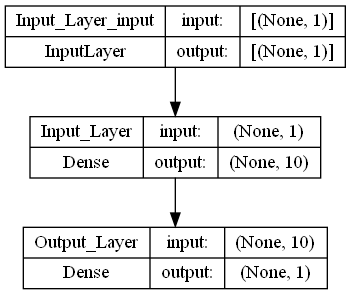

In [43]:
plot_model(model, show_shapes=True, show_layer_names=True)

## Visualizing predictions

In [44]:
# Make some predictions
Y_pred = model.predict(X_test)
Y_pred

1/1 [==============================] - 0s 250ms/step


array([[ 71.90285 ],
       [ 76.03861 ],
       [ 80.17437 ],
       [ 84.31012 ],
       [ 88.44589 ],
       [ 92.58165 ],
       [ 96.71741 ],
       [100.853165],
       [104.98892 ],
       [109.12468 ]], dtype=float32)

In [45]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [46]:
# Plotting function
def plot_predictions(train_data=X_train, train_labels=Y_train, test_data=X_test, test_labels=Y_test, predictions=Y_pred):
    """
    Plots training data, test data and compare predictions to ground truth labels
    """
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c='b', label='Training Data')
    plt.scatter(test_data, test_labels, c='g', label='Test Data')
    
    # Plot model's predictions
    plt.scatter(test_data, predictions, c='r', label='Prediction')
    # Show legend
    plt.legend()
    plt.show()

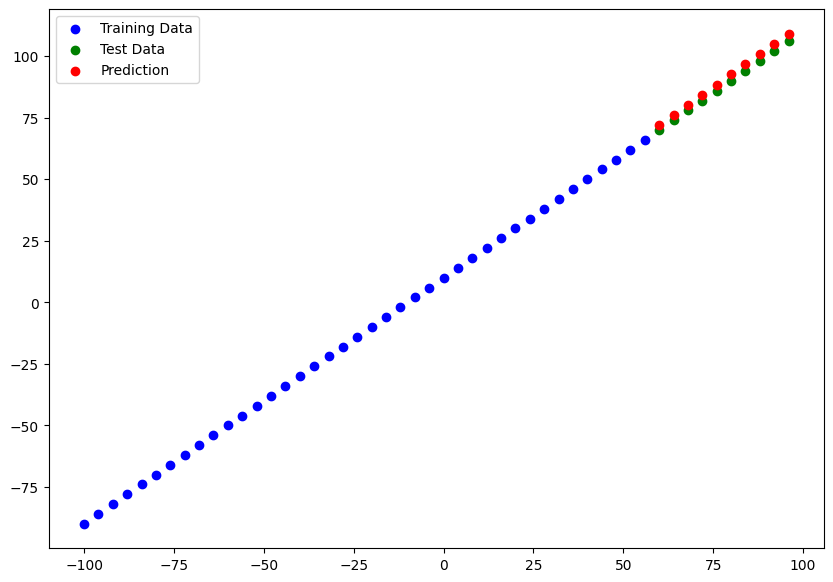

In [47]:
plot_predictions()

## Evaluating the model

In [48]:
# Evaluate the model on the test
model.evaluate(X_test, Y_test)

1/1 [==============================] - 1s 596ms/step - loss: 2.5138 - mae: 2.5138


[2.513767957687378, 2.513767957687378]

In [53]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(Y_test, tf.squeeze(Y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.5137665>

In [54]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(Y_test, tf.squeeze(Y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=6.471074>

In [56]:
# Make some functions for mse and mae
def mae(Y_true, Y_pred):
    return tf.metrics.mean_absolute_error(y_true=Y_true, y_pred=Y_pred)

def mse(Y_true, Y_pred):
    return tf.metrics.mean_squared_error(y_true=Y_true, y_pred=Y_pred)